In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



In [79]:
data = pd.read_csv('./data/train.csv')

In [80]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_log_error
from  sklearn.model_selection import train_test_split
from math import sqrt

In [81]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [127]:
features = ['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'GrLivArea',
            'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
            'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
            'GarageCars', 'ScreenPorch', 'PoolArea', 'YrSold']
X = data[features]
y = data['SalePrice']


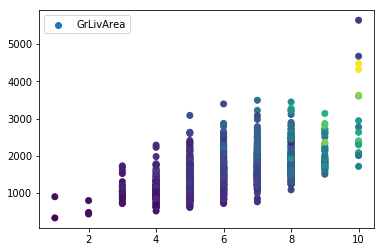

In [128]:
plt.scatter(X['OverallQual'], X['GrLivArea'], c=y)
plt.legend()


In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [130]:
from sklearn.preprocessing import Imputer
imputer = Imputer()
X_train_imp = imputer.fit_transform(X_train)
X_test_imp = imputer.fit_transform(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [131]:
regr = linear_model.LinearRegression()
regr.fit(X_train_imp, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [132]:
train_predict = regr.predict(X_train_imp)
test_predict = regr.predict(X_test_imp)

In [133]:
sqrt(mean_squared_error(y_train, train_predict)) / y_train.mean()

0.19257262650111837

In [134]:
sqrt(mean_squared_error(y_test, test_predict)) / y_test.mean()

0.23047144356979157

In [135]:
test_data = pd.read_csv('./data/test.csv')
test_data[test_data['GarageCars'].isna()].fillna(1)
test_data['GarageCars'] = np.where(test_data['GarageCars'].isna(), test_data['GarageCars'].mean(), test_data['GarageCars'])
test_data['TotalBsmtSF'] = np.where(test_data['TotalBsmtSF'].isna(), 0, test_data['TotalBsmtSF'])
test_data['GarageArea'] = np.where(test_data['GarageArea'].isna(), 0, test_data['GarageArea'])
print(test_data[features].describe())
print(test_data[test_data['GarageCars'].isna()][features])



        MSSubClass  OverallQual  OverallCond    YearBuilt    GrLivArea  \
count  1459.000000  1459.000000  1459.000000  1459.000000  1459.000000   
mean     57.378341     6.078821     5.553804  1971.357779  1486.045922   
std      42.746880     1.436812     1.113740    30.390071   485.566099   
min      20.000000     1.000000     1.000000  1879.000000   407.000000   
25%      20.000000     5.000000     5.000000  1953.000000  1117.500000   
50%      50.000000     6.000000     5.000000  1973.000000  1432.000000   
75%      70.000000     7.000000     6.000000  2001.000000  1721.000000   
max     190.000000    10.000000     9.000000  2010.000000  5095.000000   

       BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  \
count   1457.000000   1457.000000  1459.000000  1459.000000   1459.000000   
mean       0.434454      0.065202     1.570939     0.377656      2.854010   
std        0.530648      0.252468     0.555190     0.503017      0.829788   
min        0.000000      

In [138]:
test_data_imp = imputer.fit_transform(test_data[features])
predicts = regr.predict(test_data_imp)
test_data['SalePrice'] = predicts
test_data[['Id', 'SalePrice']].to_csv('result.csv', index=None)